In [1]:
# import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# setup SQL database connection
Base = automap_base()
engine = create_engine('sqlite:///../data/fbdata.sqlite')
Base.metadata.create_all(engine)
Base.prepare(engine, reflect=True)
session = Session(engine)

In [3]:
# get modelTrainTest dataframe
modelTrainTest = pd.read_sql_query("SELECT * FROM modelTrainTest", con=engine)
featuresDF = modelTrainTest[['height', 'weight', '40yard',\
       'vertleap', 'broadjump', 'shuttle', '3cone', 'games','plays', 'playsPerGame', \
       'rushAvg', 'ydsFromScrimAvg', 'compPct', 'ydsPerAtt', 'adjYdsPerAtt',\
       'effRate', 'success']]
featuresDF

,height,weight,40yard,vertleap,broadjump,shuttle,3cone,games,plays,playsPerGame,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
0,76.300,213.0,4.75,NaN,NaN,NaN,NaN,45.0,126,2.800000,-2.6,-2.4,61.3,9.0,8.7,152.9,1.0
1,75.000,212.0,4.95,28.0,108.0,4.51,NaN,32.0,141,4.406250,-3.4,-3.4,56.8,7.0,6.1,120.2,0.0
2,73.400,190.0,4.74,30.5,117.0,4.35,NaN,36.0,183,5.083333,0.9,1.0,55.2,6.6,5.7,116.4,1.0
3,74.300,203.0,NaN,NaN,NaN,NaN,NaN,49.0,218,4.448980,1.4,1.4,62.4,8.8,8.2,145.6,1.0
4,75.000,191.0,4.82,29.5,111.0,4.45,NaN,33.0,195,5.909091,2.2,2.2,51.9,7.7,6.4,122.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,76.875,224.0,NaN,NaN,NaN,NaN,NaN,30.0,83,2.766667,-3.8,-3.8,61.8,8.8,8.8,148.4,0.0
246,73.625,212.0,4.99,28.0,102.0,4.5,7.55,25.0,90,3.600000,-1.5,-1.5,68.1,8.9,9.3,161.7,0.0
247,74.625,218.0,5.0,28.0,99.0,4.25,7.07,49.0,192,3.918367,1.7,1.9,63.0,6.9,6.9,134.7,0.0
248,72.625,222.0,4.84,30.5,104.0,4.23,7.33,47.0,505,10.744681,2.3,2.3,64.3,8.5,8.8,155.2,0.0


In [4]:
# look at some correlation
corr = featuresDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,weight,vertleap,broadjump,games,plays,playsPerGame,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
height,1.000000,0.604867,-0.226084,-0.115732,-0.047125,-0.280520,-0.267569,-0.231856,-0.222582,0.053312,-0.154320,-0.067225,-0.047108,0.049581
weight,0.604867,1.000000,0.070684,0.090659,-0.054361,-0.036775,-0.015930,0.052464,0.051276,0.094885,-0.007308,0.118378,0.100526,0.017640
vertleap,-0.226084,0.070684,1.000000,0.760827,-0.100388,0.401108,0.477107,0.539149,0.538297,0.077454,0.213127,0.231656,0.194813,0.177422
broadjump,-0.115732,0.090659,0.760827,1.000000,-0.057144,0.403518,0.487826,0.544740,0.541115,0.101220,0.170396,0.197476,0.169614,0.194551
games,-0.047125,-0.054361,-0.100388,-0.057144,1.000000,0.387028,0.028603,-0.022740,-0.010253,0.162099,0.028221,0.079487,0.103685,0.042766
plays,-0.280520,-0.036775,0.401108,0.403518,0.387028,1.000000,0.903204,0.631345,0.618292,0.100856,0.130703,0.153012,0.136345,0.101155
playsPerGame,-0.267569,-0.015930,0.477107,0.487826,0.028603,0.903204,1.000000,0.703530,0.685496,0.072849,0.186825,0.191050,0.159246,0.135315
rushAvg,-0.231856,0.052464,0.539149,0.544740,-0.022740,0.631345,0.703530,1.000000,0.990185,0.067454,0.172653,0.203673,0.169429,0.187493
ydsFromScrimAvg,-0.222582,0.051276,0.538297,0.541115,-0.010253,0.618292,0.685496,0.990185,1.000000,0.069758,0.163985,0.198807,0.166310,0.200371
compPct,0.053312,0.094885,0.077454,0.101220,0.162099,0.100856,0.072849,0.067454,0.069758,1.000000,0.512565,0.617181,0.770804,0.112934


C:\Users\kosib\.conda\envs\PythonData\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kosib\.conda\envs\PythonData\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  4., 18., 19., 35., 33., 40., 15.,  9., 12.]),
 array([21.5 , 23.25, 25.  , 26.75, 28.5 , 30.25, 32.  , 33.75, 35.5 ,
        37.25, 39.  ]),
 <a list of 10 Patch objects>)

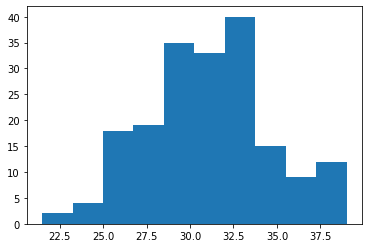

In [5]:
#scatter plot(s)
plt.hist(featuresDF['vertleap'])

In [6]:
# narrow features
featuresNarrow = featuresDF[['height', 'weight', '40yard',\
       'vertleap', 'broadjump', 'playsPerGame', \
       'rushAvg', 'ydsFromScrimAvg', 'compPct', 'ydsPerAtt', 'adjYdsPerAtt',\
       'effRate', 'success']]

In [7]:
# look at some correlation
corr = featuresNarrow.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,weight,vertleap,broadjump,playsPerGame,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
height,1.000000,0.604867,-0.226084,-0.115732,-0.267569,-0.231856,-0.222582,0.053312,-0.154320,-0.067225,-0.047108,0.049581
weight,0.604867,1.000000,0.070684,0.090659,-0.015930,0.052464,0.051276,0.094885,-0.007308,0.118378,0.100526,0.017640
vertleap,-0.226084,0.070684,1.000000,0.760827,0.477107,0.539149,0.538297,0.077454,0.213127,0.231656,0.194813,0.177422
broadjump,-0.115732,0.090659,0.760827,1.000000,0.487826,0.544740,0.541115,0.101220,0.170396,0.197476,0.169614,0.194551
playsPerGame,-0.267569,-0.015930,0.477107,0.487826,1.000000,0.703530,0.685496,0.072849,0.186825,0.191050,0.159246,0.135315
rushAvg,-0.231856,0.052464,0.539149,0.544740,0.703530,1.000000,0.990185,0.067454,0.172653,0.203673,0.169429,0.187493
ydsFromScrimAvg,-0.222582,0.051276,0.538297,0.541115,0.685496,0.990185,1.000000,0.069758,0.163985,0.198807,0.166310,0.200371
compPct,0.053312,0.094885,0.077454,0.101220,0.072849,0.067454,0.069758,1.000000,0.512565,0.617181,0.770804,0.112934
ydsPerAtt,-0.154320,-0.007308,0.213127,0.170396,0.186825,0.172653,0.163985,0.512565,1.000000,0.930117,0.895045,0.130353
adjYdsPerAtt,-0.067225,0.118378,0.231656,0.197476,0.191050,0.203673,0.198807,0.617181,0.930117,1.000000,0.966007,0.137774
